Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


1. Read the dataset to the python environment.

In [ ]:
train_data = pd.read_csv('/content/train_loan (1).csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2. Do necessary pre-processing steps.

In [ ]:
train_data['Loan_Status'] = train_data['Loan_Status'].map( {'Y' : 1, 'N' : 0} )
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
train_data.describe(percentiles = [.31, .32 ])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
31%,3083.000000,0.000000,109.210000,360.00000,1.000000,0.000000
32%,3100.480000,0.000000,110.000000,360.00000,1.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [ ]:
train_data.drop('Loan_ID', axis = 1, inplace = True)
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


<ipython-input-6-de88d13aba47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True)


<Axes: >

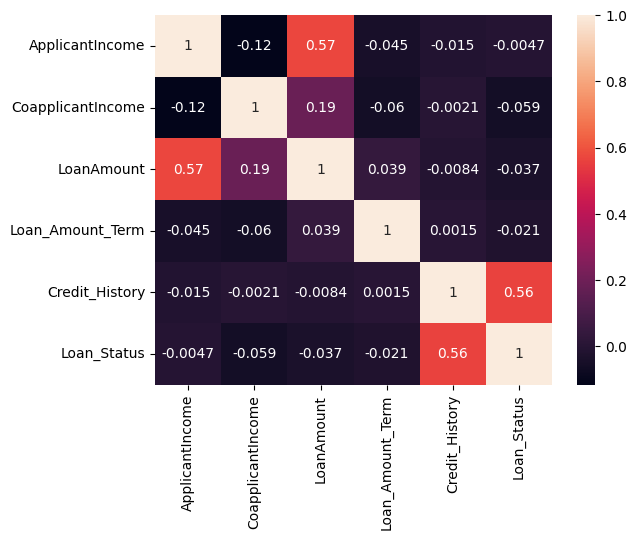

In [ ]:
sns.heatmap(train_data.corr(), annot = True)

Filling Missing Data

In [ ]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train_data[['Married', 'Dependents', 'Gender']].groupby(['Dependents', 'Gender'], as_index = False).mean()

<ipython-input-8-cf51402f70a0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_data[['Married', 'Dependents', 'Gender']].groupby(['Dependents', 'Gender'], as_index = False).mean()


,Dependents,Gender
0,0,Female
1,0,Male
2,1,Female
3,1,Male
4,2,Female
5,2,Male
6,3+,Female
7,3+,Male


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 67.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Dependents', ylabel='ApplicantIncome'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


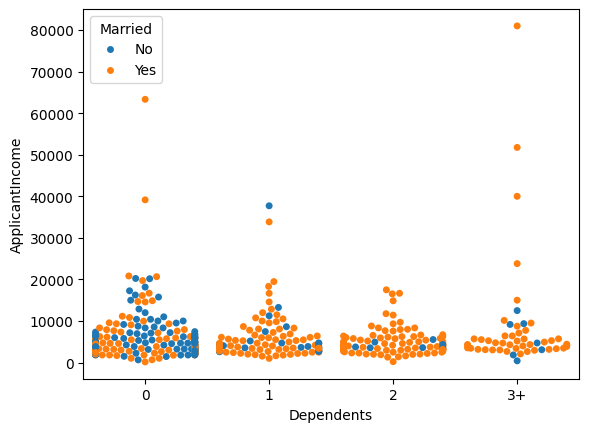

In [ ]:
sns.swarmplot(x = 'Dependents', y = 'ApplicantIncome', hue = 'Married', data = train_data)

In [ ]:
train_data[['Married', 'Dependents', 'ApplicantIncome']].groupby('Dependents').median()

<ipython-input-10-b587b08147ae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_data[['Married', 'Dependents', 'ApplicantIncome']].groupby('Dependents').median()


,ApplicantIncome
Dependents,
0,3598.0
1,4051.5
2,4006.0
3+,4691.0


In [ ]:
print(train_data.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
cf = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for i in cf:
    mode_value = train_data[i].mode()[0]
    train_data[i] = train_data[i].fillna(mode_value)

# Check if missing values are filled
print(train_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
nf = ['LoanAmount', 'Loan_Amount_Term']
median_values = train_data[nf].median()
train_data[nf] = train_data[nf].fillna(median_values)
print(train_data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
cf = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents', 'Loan_Status']
label_encoder = LabelEncoder()
for i in cf:
    train_data[i] = label_encoder.fit_transform(train_data[i])
print(train_data.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2    

In [ ]:
from sklearn.model_selection import train_test_split
X = train_data.drop(columns=['Loan_Status'])
y = train_data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (491, 11) (491,)
Testing set shape: (123, 11) (123,)


** Applying Ensemble Techniques**

1. decision tree

In [ ]:
train_data['Gender'].unique()

array([1, 0])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy = ", accuracy_score(y_test, y_pred))

Accuracy =  0.7073170731707317


2. Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100, random_state=42)
rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred_rf))

Accuracy =  0.7560975609756098


 3. Bagging with Decision Tree as Base

In [ ]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(estimator = tree, n_estimators = 100, random_state = 42)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [ ]:
y_pred_bg = bagging_clf.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred_bg))

Accuracy =  0.7398373983739838


 5.Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(X_train,y_train)
y_pred_ada = gb_clf.predict(X_test)

print("Accuracy = ", accuracy_score(y_test, y_pred_ada))

Accuracy =  0.7479674796747967


 6. Xtreme Gradient Boosting

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("Accuracy = ", accuracy_score(y_test, y_pred_xgb))

Accuracy =  0.7398373983739838


**Random Forest classifier achieved the highest accuracy (0.756)**